# Notebook de análise exploratória dos dados (EDA)

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [2]:
# Configurar paleta de cores e estilo

# Matplotlib
mpl.rcParams["figure.figsize"] = (20, 7)
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["font.size"] = 12
mpl.rcParams["figure.titlesize"] = 25
mpl.rcParams["figure.dpi"] = 100

# Seaborn
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": "--"})
sns.set_palette(palette='mako')

## Aquisição dos dados

In [24]:
input_path = '../data/processed/dados_historicos_ibovespa_2015-2025_processed.csv'

df = pd.read_csv(input_path, index_col='ds', parse_dates=['ds'])
df.tail()

,close,open,high,low,volume,daily_return,return_lag_1,return_lag_2,return_lag_3,return_lag_4,...,close_lag7,sma_21,ema_50,rsi_14,atr_14,obv,day_of_week,day_of_month,month,year
ds,,,,,,,,,,,,,,,,,,,,,
2025-06-12,137800,137127,137931,136175,7.120000e+09,0.0049,0.0051,0.0054,-0.0030,-0.0010,...,137546.0,137814.619048,134894.977670,56.429439,1746.368879,1.365133e+11,3,12,6,2025
2025-06-13,137213,137800,137800,136586,8.630000e+09,-0.0043,0.0049,0.0051,0.0054,-0.0030,...,137002.0,137713.619048,134985.880507,53.149650,1708.342531,1.278833e+11,4,13,6,2025
2025-06-16,139256,137212,139988,137212,7.620000e+09,0.0149,-0.0043,0.0049,0.0051,0.0054,...,136236.0,137716.904762,135153.336173,61.530240,1784.603778,1.355033e+11,0,16,6,2025
2025-06-17,138840,139256,139497,138293,8.380000e+09,-0.0030,0.0149,-0.0043,0.0049,0.0051,...,136102.0,137679.000000,135297.911225,59.207770,1743.132080,1.271233e+11,1,17,6,2025
2025-06-18,138717,138844,139161,138443,8.320000e+09,-0.0009,-0.0030,0.0149,-0.0043,0.0049,...,135699.0,137612.666667,135431.993138,58.504620,1669.908360,1.188033e+11,2,18,6,2025


In [25]:
target_values = (df['close'].shift(-1) > df['close']).astype(int)
df.insert(0, 'target', target_values)
df.dropna(axis=0)

,target,close,open,high,low,volume,daily_return,return_lag_1,return_lag_2,return_lag_3,...,close_lag7,sma_21,ema_50,rsi_14,atr_14,obv,day_of_week,day_of_month,month,year
ds,,,,,,,,,,,,,,,,,,,,,
2015-06-17,1,53249,53698,53755,52965,3.090000e+06,-0.0084,0.0106,-0.0039,-0.0064,...,52810.0,53785.285714,53919.575856,44.356672,889.081392,7.850009e+07,2,17,6,2015
2015-06-18,0,54239,53251,54352,53214,2.750000e+06,0.0186,-0.0084,0.0106,-0.0039,...,52816.0,53725.285714,53932.102293,51.525407,906.861293,8.125009e+07,3,18,6,2015
2015-06-19,1,53749,54236,54236,53479,2.950000e+06,-0.0090,0.0186,-0.0084,0.0106,...,53876.0,53670.428571,53924.921811,48.214460,896.371201,7.830009e+07,4,19,6,2015
2015-06-22,0,53864,53750,54342,53655,2.430000e+06,0.0021,-0.0090,0.0186,-0.0084,...,53689.0,53611.000000,53922.532720,49.042076,881.416115,8.073009e+07,0,22,6,2015
2015-06-23,1,53772,53865,54361,53772,2.710000e+06,-0.0017,0.0021,-0.0090,0.0186,...,53348.0,53582.190476,53916.629476,48.375998,860.529250,7.802009e+07,1,23,6,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-12,0,137800,137127,137931,136175,7.120000e+09,0.0049,0.0051,0.0054,-0.0030,...,137546.0,137814.619048,134894.977670,56.429439,1746.368879,1.365133e+11,3,12,6,2025
2025-06-13,1,137213,137800,137800,136586,8.630000e+09,-0.0043,0.0049,0.0051,0.0054,...,137002.0,137713.619048,134985.880507,53.149650,1708.342531,1.278833e+11,4,13,6,2025
2025-06-16,0,139256,137212,139988,137212,7.620000e+09,0.0149,-0.0043,0.0049,0.0051,...,136236.0,137716.904762,135153.336173,61.530240,1784.603778,1.355033e+11,0,16,6,2025


In [26]:
# informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2482 entries, 2015-06-17 to 2025-06-18
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        2482 non-null   int64  
 1   close         2482 non-null   int64  
 2   open          2482 non-null   int64  
 3   high          2482 non-null   int64  
 4   low           2482 non-null   int64  
 5   volume        2482 non-null   float64
 6   daily_return  2482 non-null   float64
 7   return_lag_1  2482 non-null   float64
 8   return_lag_2  2482 non-null   float64
 9   return_lag_3  2482 non-null   float64
 10  return_lag_4  2482 non-null   float64
 11  return_lag_5  2482 non-null   float64
 12  momentum_5    2482 non-null   float64
 13  momentum_21   2482 non-null   float64
 14  momentum_63   2482 non-null   float64
 15  close_lag1    2482 non-null   float64
 16  close_lag3    2482 non-null   float64
 17  close_lag5    2482 non-null   float64
 18  close_lag7

## Análise exploratória

In [27]:
# resumo estatístico básico
df.describe()

,target,close,open,high,low,volume,daily_return,return_lag_1,return_lag_2,return_lag_3,...,close_lag7,sma_21,ema_50,rsi_14,atr_14,obv,day_of_week,day_of_month,month,year
count,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2.482000e+03,2482.000000,2482.000000,2482.000000,2482.000000,...,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2.482000e+03,2482.000000,2482.000000,2482.000000,2482.000000
mean,0.522965,95761.666801,95728.100725,96579.991942,94908.077760,4.883083e+08,0.000496,0.000501,0.000500,0.000492,...,95523.145044,95422.952247,94957.322060,52.841734,1669.564195,3.614648e+09,1.999194,15.776793,6.497180,2019.970991
std,0.499573,26696.892083,26696.097392,26794.265729,26591.710939,2.275271e+09,0.014992,0.014993,0.014993,0.014991,...,26696.994209,26582.900989,26294.429239,12.039613,664.653090,1.905251e+10,1.409074,8.743843,3.412078,2.919304
min,0.000000,37497.000000,37501.000000,38031.000000,37046.000000,4.243200e+05,-0.147800,-0.147800,-0.147800,-0.147800,...,37497.000000,39071.190476,41523.235486,19.502335,682.015554,-8.576688e+09,0.000000,1.000000,1.000000,2015.000000
25%,0.000000,74319.000000,74313.000000,75035.000000,73268.000000,3.922500e+06,-0.007200,-0.007200,-0.007200,-0.007200,...,74062.500000,74097.547619,73871.449137,44.093116,1293.277918,2.162900e+08,1.000000,8.000000,4.000000,2017.000000
50%,1.000000,102466.500000,102403.500000,103607.500000,101547.000000,7.620000e+06,0.000700,0.000700,0.000700,0.000700,...,102229.000000,102516.690476,102271.560339,52.472945,1576.162737,3.953618e+08,2.000000,16.000000,7.000000,2020.000000
75%,1.000000,117414.500000,117370.000000,118287.500000,116263.750000,1.120000e+07,0.008400,0.008400,0.008400,0.008400,...,117191.250000,116691.488095,115525.736813,61.554550,1907.267469,6.958693e+08,3.000000,23.000000,9.000000,2022.000000
max,1.000000,140110.000000,140109.000000,140382.000000,138966.000000,2.487000e+10,0.139100,0.139100,0.139100,0.139100,...,140110.000000,137982.619048,135431.993138,84.282462,6755.132249,1.820933e+11,4.000000,31.000000,12.000000,2025.000000


### Análise univariada

In [18]:
df['close'].describe()

count      2482.000000
mean      95761.666801
std       26696.892083
min       37497.000000
25%       74319.000000
50%      102466.500000
75%      117414.500000
max      140110.000000
Name: close, dtype: float64

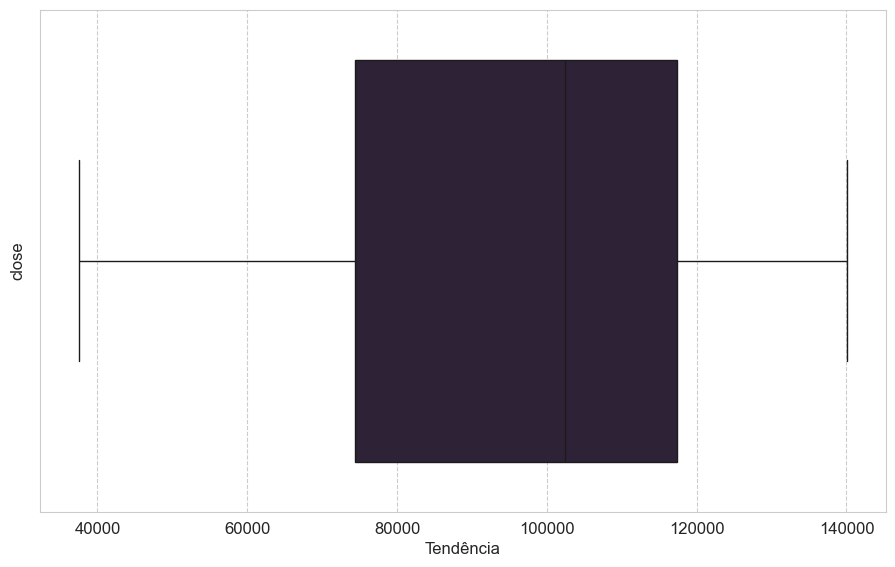

In [29]:
colunas = df[['close']]

plt.figure(figsize=(24,30))

for i, coluna in enumerate(colunas, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x=coluna)
    plt.xlabel('Tendência')
    plt.ylabel(coluna)

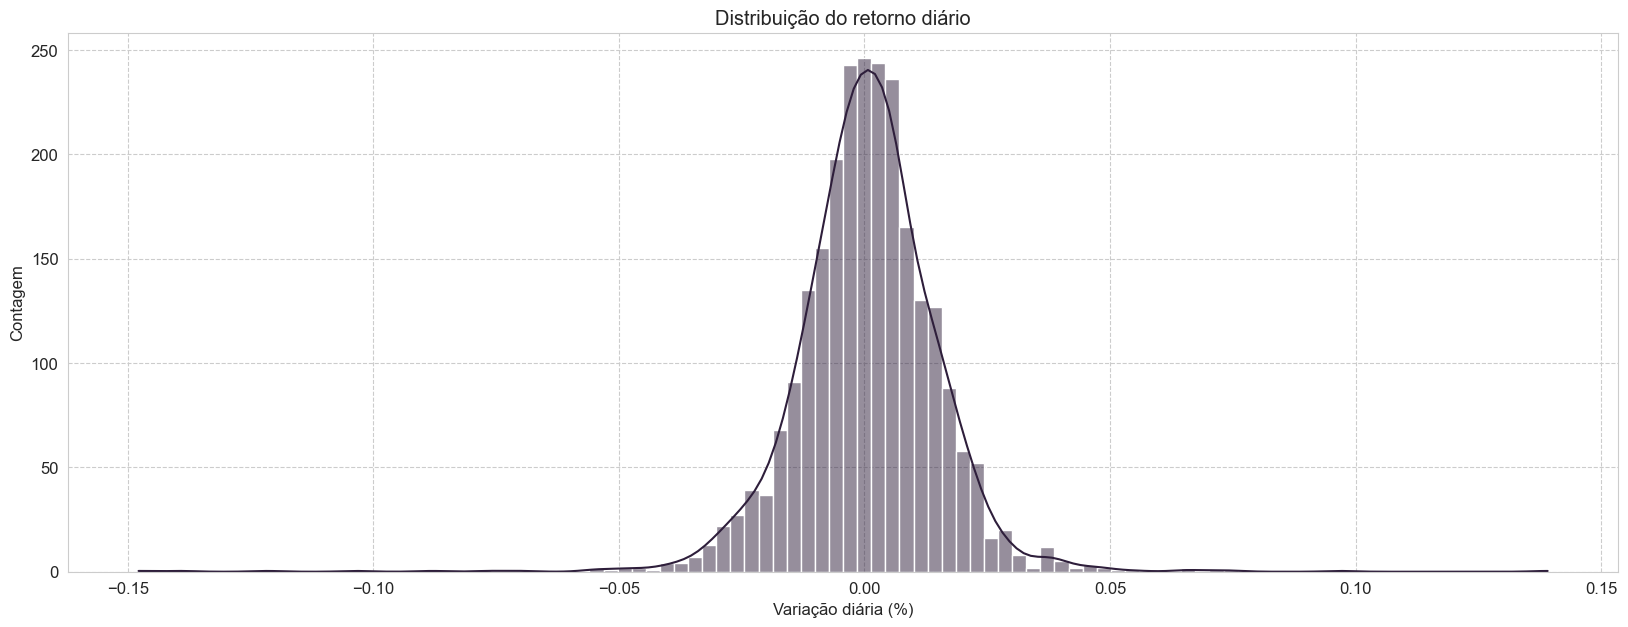

In [7]:
# Distribuição do retorno diário
sns.histplot(df['daily_return'], kde=True)

# Título e rótulos dos eixos
plt.title('Distribuição do retorno diário')
plt.xlabel('Variação diária (%)')
plt.ylabel('Contagem')

plt.show()

Para conferir estatisticamente qual o comportamento dessa distribuição, vamos usar um teste de Shapiro-Wilk (vide tópico "Teste de hipótese" nesse notebook)

#### Teste de hipótese

O teste de Shapiro-Wilk é um teste de hipótese que verifica se uma amostra de dados segue uma distribuição normal.

* Hipótese Nula (H₀): A amostra provém de uma população com distribuição normal.
* Hipótese Alternativa (H₁): A amostra NÃO provém de uma população com distribuição normal.

In [8]:
# Teste de hipótese da distribuição do retorno diário
stat, p = stats.shapiro(df['daily_return'])
print(f'Estatística do teste: {stat:.4f}\nValor-p: {p}')

# Nível de significância de 95%
alpha = 0.05
if p > alpha:
    print("\nConclusão: Não há evidência suficiente para rejeitar a hipótese nula. Os dados seguem uma distribuição normal.")
else:
    print("\nConclusão: Rejeitamos a hipótese nula. Os dados NÃO seguem uma distribuição normal.")

Estatística do teste: 0.9032
Valor-p: 4.8425205682773785e-37

Conclusão: Rejeitamos a hipótese nula. Os dados NÃO seguem uma distribuição normal.


Validamos estatisticamente que os retornos do mercado financeiro possuem "caudas gordas" (mais eventos extremos do que o normal). Isso é crucial para entender o risco e a volatilidade do mercado. Modelos como Random Forest e XGBoost é a mais adequada para capturar os padrões complexos e não-lineares presentes no mercado.

### Análise de série temporal

In [9]:
# Gráfico de candlestick com abertura, fechamento, máxima e mínima
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='OHLC',
    hovertext=[
        f"<b>Data</b>: {d.strftime('%d/%m/%Y')}<br>"
        f"<b>Abertura</b>: {o:.0f}<br>"
        f"<b>Máxima</b>: {h:.0f}<br>"
        f"<b>Mínima</b>: {l:.0f}<br>"
        f"<b>Fechamento</b>: {c:.0f}"
        for d, o, h, l, c in zip(df.index, df['open'], df['high'], df['low'], df['close'])
    ],
    hoverinfo='text'
)])

# Gráfico para a média móvel simples
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['sma_21'],
    marker_color='blue',
    opacity=0.5,
    name='MMS (21d)'
))

# Título e rótulos dos eixos
fig.update_layout(
    title=dict(text='Análise histórica do índice IBOVESPA' + '<br><sup>dos últimos 10 anos</sup>', x=0.5, font_size=20),
    xaxis=dict(title='Data'),                                                  
    yaxis=dict(title='Preço OHLC (R$)'),
    template='plotly_white',
    height=700
)

# Atualizar eixo X de 1 em 1 ano
fig.update_xaxes(
    dtick="M12",
    tickformat="%Y",
    rangeslider_visible=False
)

fig.show()

In [10]:
# Criar subplot na figura
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Gráfico de preço de fechamento
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['close'],
    mode='lines',
    name='Preço de fechamento',
    line=dict(color='blue'),
    showlegend=False
), row=1, col=1)

# Gráfico de IFR
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['rsi_14'],
    mode='lines',
    name='IFR',
    line=dict(color='orange'),
    showlegend=False
), row=2, col=1)

# Linhas horizontais para o IFR
fig.add_hline(y=70, line_dash='dash', line_color='red', annotation_text='Sobrecompra (70)', row=2, col=1)
fig.add_hline(y=30, line_dash='dash', line_color='green', annotation_text='Sobrevenda (30)', row=2, col=1)

# Título e rótulo dos eixos
fig.update_layout(
    title=dict(text='Preço de fechamento e IFR do IBOVESPA', x=0.5, font_size=20),
    xaxis2=dict(title='Data'),
    yaxis=dict(title='Preço de fechamento (R$)'),
    yaxis2=dict(range=[0,100], autorange=False, title='Índice de força relativa'),
    template='plotly_white',
    height=700
)

# Atualizar eixo X de 1 em 1 ano
fig.update_xaxes(
    dtick='M12',
    tickformat='%Y'
)

fig.show()

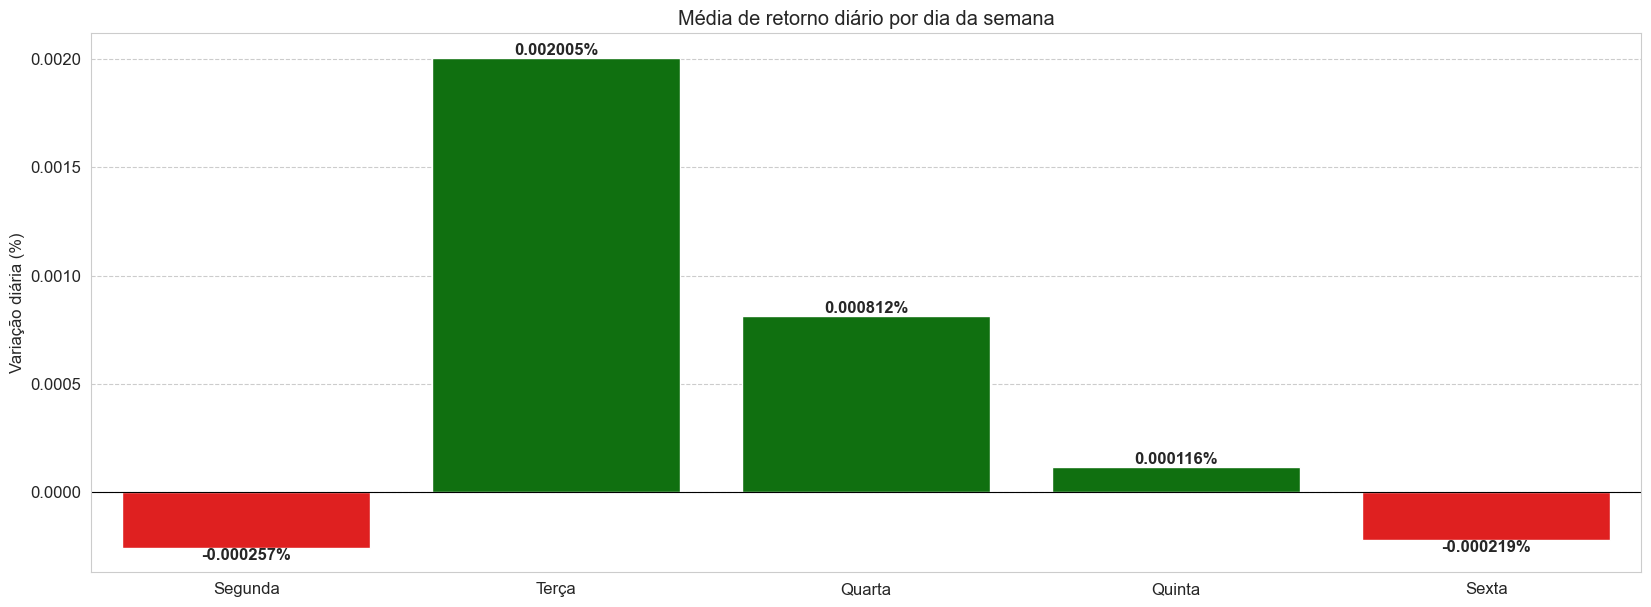

In [11]:
df_week = df.groupby('day_of_week')['daily_return'].mean().reset_index()

# Gráfico de barra de agrupamento por dia da semana
cores = ['green' if x > 0 else 'red' for x in df_week['daily_return']]
ax = sns.barplot(df_week, x='day_of_week', y='daily_return', hue='day_of_week', palette=cores, legend=False)
plt.axhline(0, color='black', linewidth=0.8)

# Título e rótulo dos eixos
plt.title('Média de retorno diário por dia da semana')
plt.ylabel('Variação diária (%)')
plt.xlabel('')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'])

# Adiciona os valores nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height,
        s=f'{height:.6f}%',
        ha='center',
        va='bottom' if height > 0 else 'top',
        fontsize=12,
        fontweight='bold'
    )

plt.show()


A semana tende a começar (segunda) e terminar (sexta) com pequenas perdas médias. 

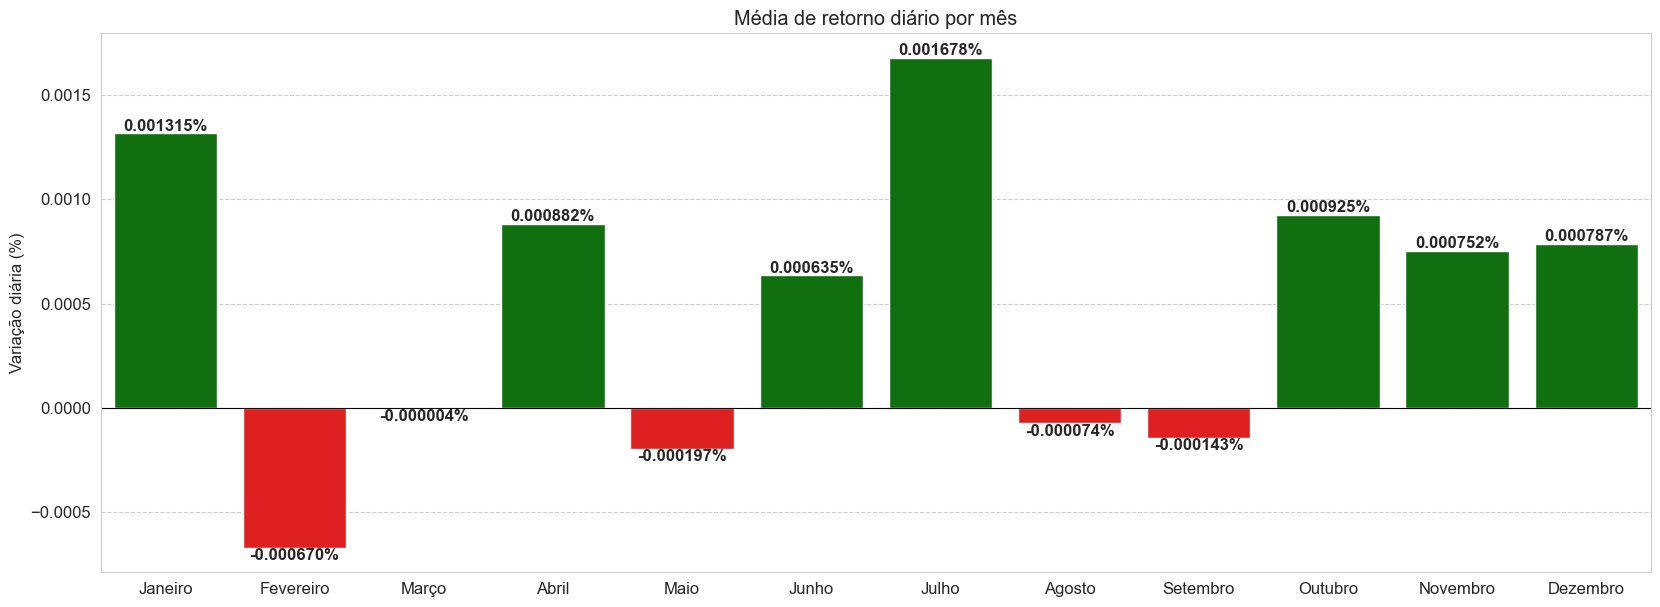

In [12]:
df_month = df.groupby('month')['daily_return'].mean().reset_index()

# Gráfico de barra de agrupamento por dia da semana
cores = ['green' if x > 0 else 'red' for x in df_month['daily_return']]
ax = sns.barplot(df_month, x='month', y='daily_return', hue='month', palette=cores, legend=False)
plt.axhline(0, color='black', linewidth=0.8)

# Título e rótulo dos eixos
plt.title('Média de retorno diário por mês')
plt.ylabel('Variação diária (%)')
plt.xlabel('')
plt.xticks(ticks=range(12), labels=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

# Adiciona os valores nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height,
        s=f'{height:.6f}%',
        ha='center',
        va='bottom' if height > 0 else 'top',
        fontsize=12,
        fontweight='bold'
    )

plt.show()

Janeiro e julho têm melhores retornos positivos, enquanto fevereiro tem o pior. Março e agosto têm desempenho praticamente neutro, com retorno próximo de zero.

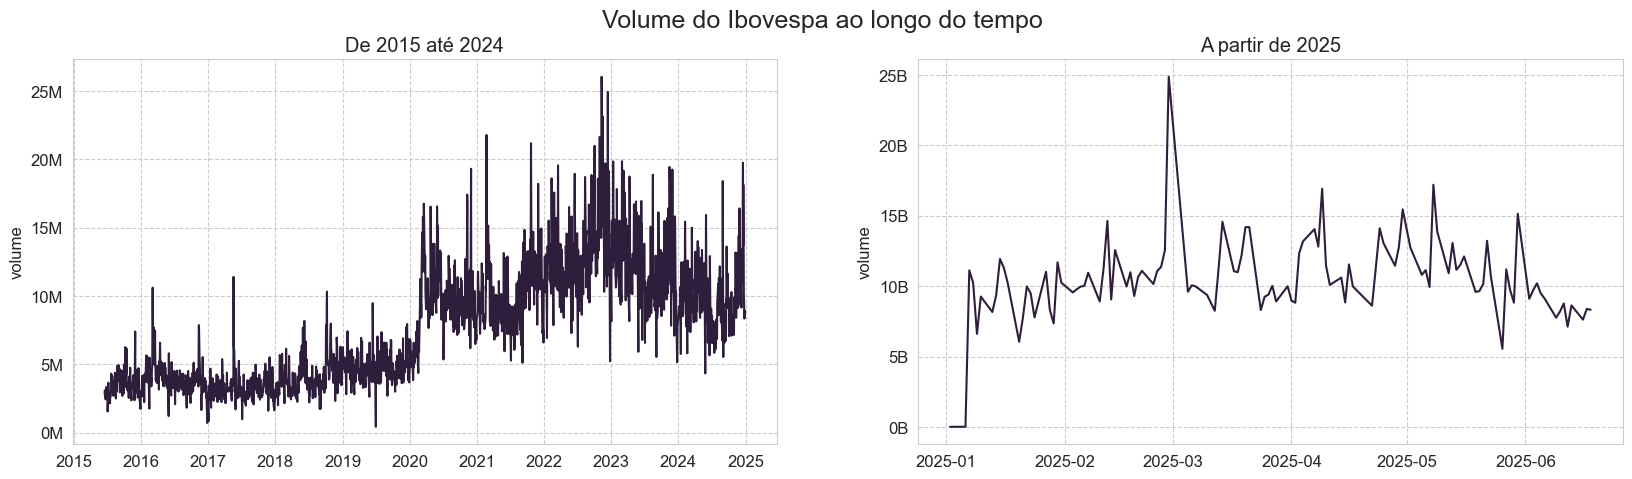

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))

df_2015_2024 = df.loc[df.index.year < 2025]
df_2025 = df.loc[df.index.year >= 2025]

plt.suptitle('Volume do Ibovespa ao longo do tempo', size=18)

sns.lineplot(data=df_2015_2024, x=df_2015_2024.index, y='volume', ax=ax[0])
ax[0].set_title('De 2015 até 2024')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_locator(mdates.YearLocator(base=1))
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:,.0f}M'))

sns.lineplot(data=df_2025, x=df_2025.index, y='volume', ax=ax[1])
ax[1].set_title('A partir de 2025')
ax[1].set_xlabel('')
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e9:,.0f}B'))

plt.show()

Existe uma mudança abrupta na escala do volume a partir de 7 de janeiro de 2025. Pode ser erro na base de dados.
(professores falaram que os dados estão corretos)

Melhor não usar o volume ou as features baseadas no volume devido a essa mudança de escala, pois afetaria negativamente o treinamento do modelo.

### Análise multivariada

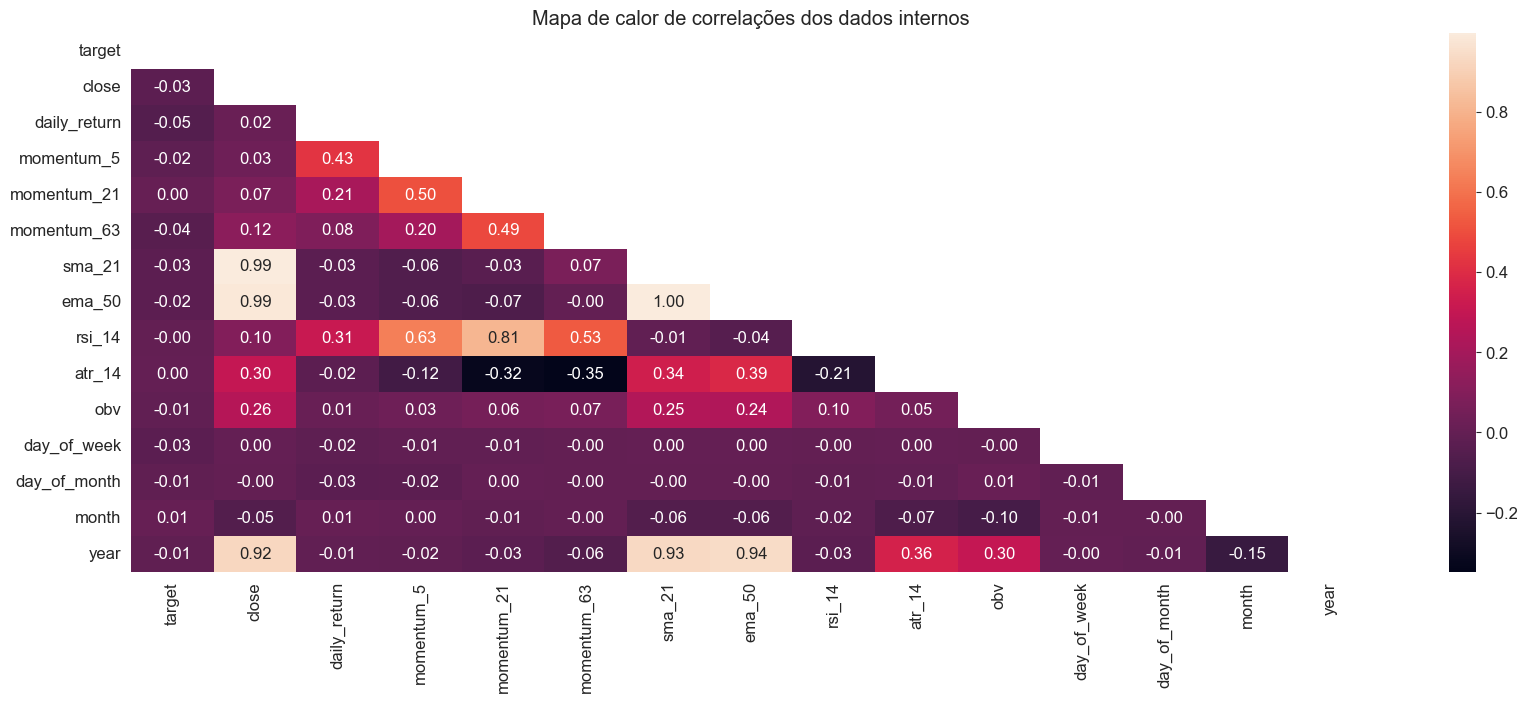

In [31]:
# mapa de calor de correlação das variáveis
columns_corr1 = ['target', 'close', 'daily_return', 'momentum_5', 'momentum_21', 'momentum_63', 'sma_21', 'ema_50', 'rsi_14', 'atr_14', 'obv', 'day_of_week', 'day_of_month', 'month', 'year']
corr = df[columns_corr1].corr(numeric_only=True)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
plt.title('Mapa de calor de correlações dos dados internos')
plt.grid(False)
plt.show()

As colunas de fechamento, SMA e EMA têm uma correlação muito alta. Para evitar multicolinariedade no modelo, vamos usar apenas uma dessas features no treinamento. As métricas de Average True Range e e On-balance Volume tem correlação significativa com a coluna de fechamento, enquanto o Índice de Força Relativa e o Momentum semanal tem relação com o retorno diário do Ibovespa.

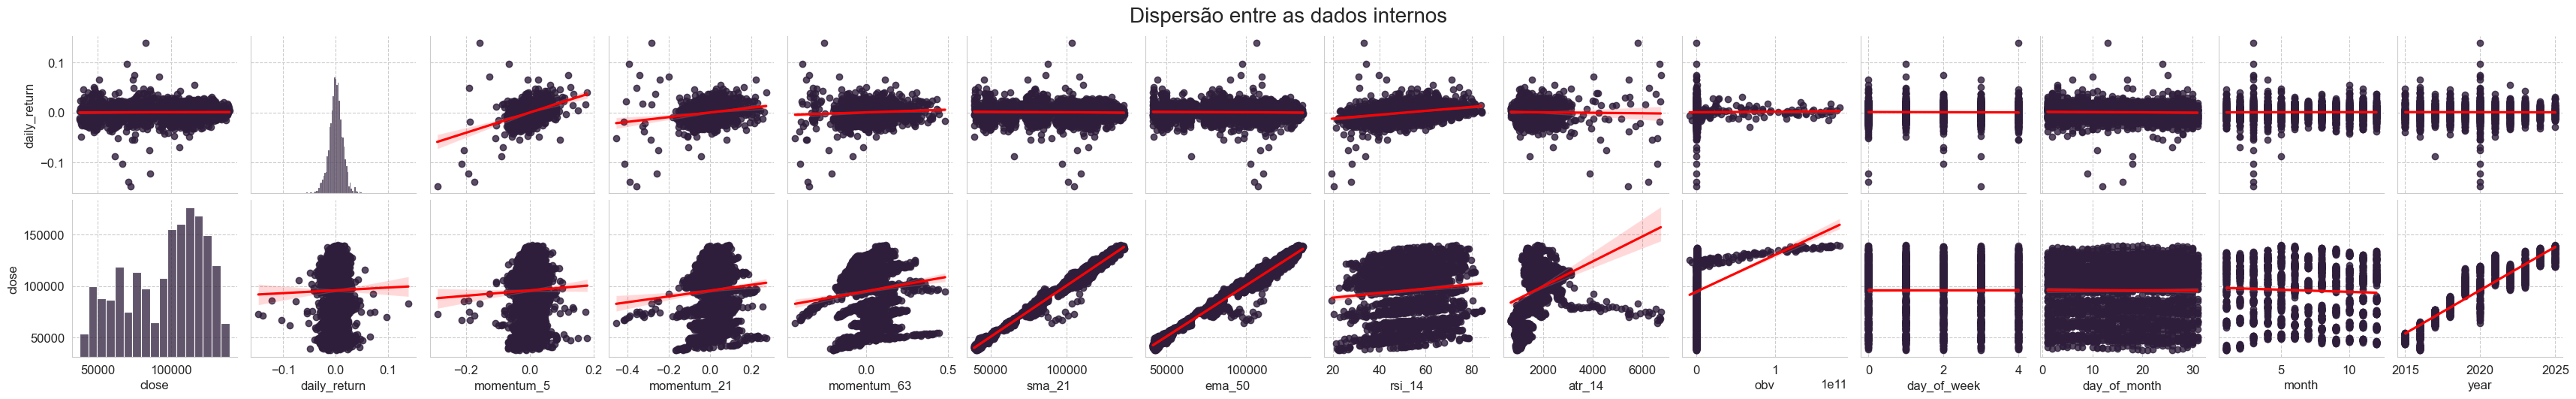

In [15]:
ax = sns.pairplot(df, y_vars=['daily_return', 'close'], x_vars=columns_corr1, kind='reg', plot_kws={'line_kws':{'color':'red'}})
ax.figure.suptitle('Dispersão entre as dados internos', fontsize=20, y=1.05)
plt.show()

In [17]:
df.columns

Index(['close', 'open', 'high', 'low', 'volume', 'daily_return',
       'return_lag_1', 'return_lag_2', 'return_lag_3', 'return_lag_4',
       'return_lag_5', 'momentum_5', 'momentum_21', 'momentum_63',
       'close_lag1', 'close_lag3', 'close_lag5', 'close_lag7', 'sma_21',
       'ema_50', 'rsi_14', 'atr_14', 'obv', 'day_of_week', 'day_of_month',
       'month', 'year'],
      dtype='object')

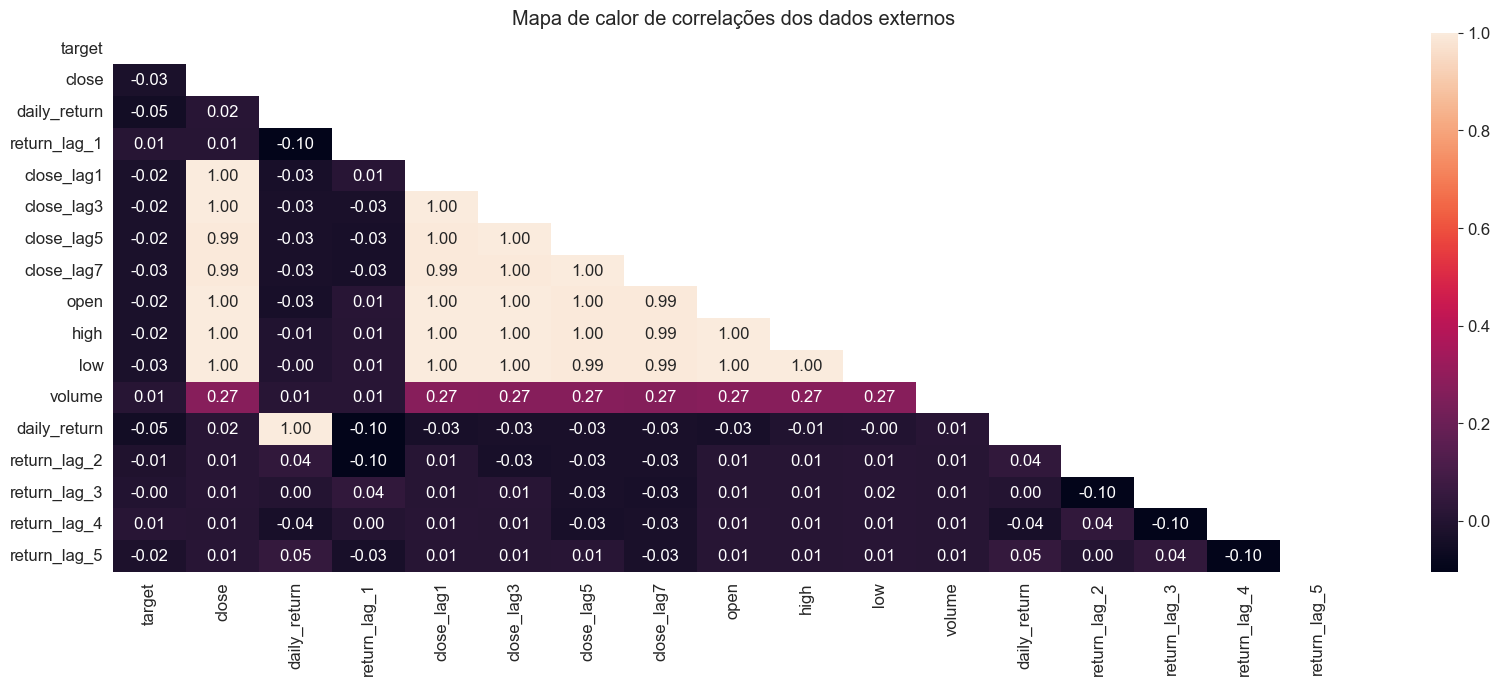

In [32]:
# mapa de calor de correlação das variáveis baseadas em fontes externas
columns_corr2 = ['target','close', 'daily_return', 'return_lag_1', 'close_lag1', 'close_lag3', 'close_lag5', 'close_lag7',
                'open', 'high', 'low', 'volume', 'daily_return', 'return_lag_2', 'return_lag_3', 'return_lag_4',
                'return_lag_5',]
corr = df[columns_corr2].corr(numeric_only=True)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
plt.title('Mapa de calor de correlações dos dados externos')
plt.grid(False)
plt.show()

Os dados externos apresentam correlação fraca com o retorno diário e o fechamento.

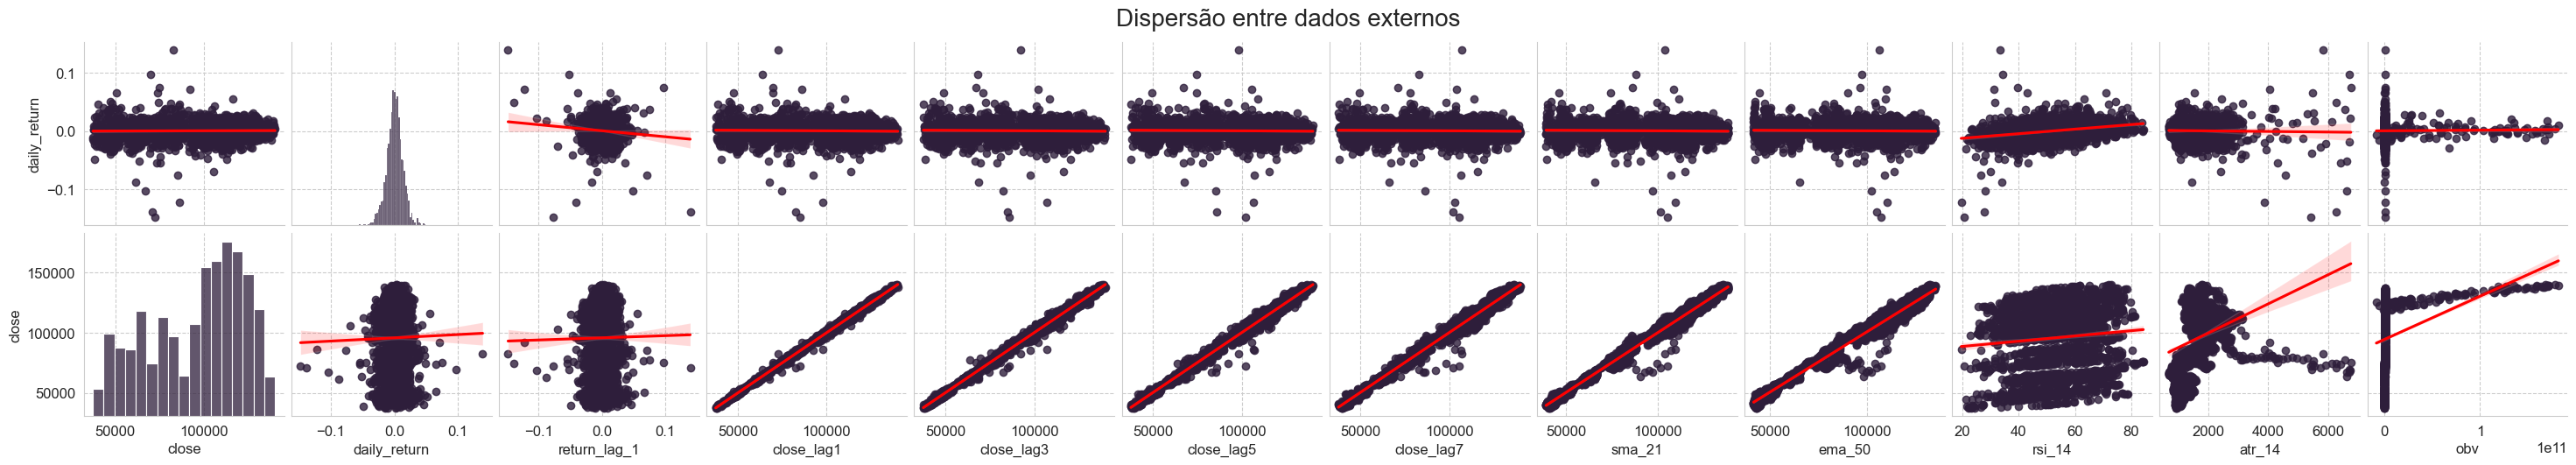

In [20]:
ax = sns.pairplot(df, y_vars=['daily_return', 'close'], x_vars=columns_corr2, kind='reg', plot_kws={'line_kws':{'color':'red'}})
ax.figure.suptitle('Dispersão entre dados externos', fontsize=20, y=1.05)
plt.show()